# Problem Statement

Hospital readmission within 30 days is a key indicator of healthcare quality
and significantly contributes to medical costs. Approximately 20% of
Medicare patients are readmitted within 30 days of discharge, costing an
estimated $17 billion annually. Predicting such readmissions allows
hospitals to intervene early and improve patient outcomes.
In this assignment, you are provided with a real-world dataset — The
Diabetes 130-US hospitals dataset — containing information on ~70,000
patient encounters from 130 U.S. hospitals (1999–2008). Your objective is
to build a binary classification machine learning model to predict whether a
patient will be readmitted within 30 days of discharge.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df = pd.read_csv("diabetic_data.csv")


In [13]:
#Replaceing "?" with NaN

df.replace("?", np.nan, inplace=True)



# EDA 


### Check basic infomation AND TABLE


In [14]:
# Check basic infomation
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,1.017660e+05,1.017660e+05,99493,101766,101766,3197,101766.000000,101766.000000,101766.000000,101766.000000,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,NaN,NaN,5,3,10,9,NaN,NaN,NaN,NaN,...,1,4,4,2,2,2,2,2,2,3
top,NaN,NaN,Caucasian,Female,[70-80),[75-100),NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,NaN,76099,54708,26068,1336,NaN,NaN,NaN,NaN,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864
mean,1.652016e+08,5.433040e+07,NaN,NaN,NaN,NaN,2.024006,3.715642,5.754437,4.395987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.026403e+08,3.869636e+07,NaN,NaN,NaN,NaN,1.445403,5.280166,4.064081,2.985108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.496119e+07,2.341322e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.523890e+08,4.550514e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.302709e+08,8.754595e+07,NaN,NaN,NaN,NaN,3.000000,4.000000,7.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Target Variable Distribution
	Plot the frequency of each class in the readmitted column .
	Then, converts this into a binary target for classification:
	1 → Readmitted within 30 days (<30)
	0 → Not readmitted (NO or >30)



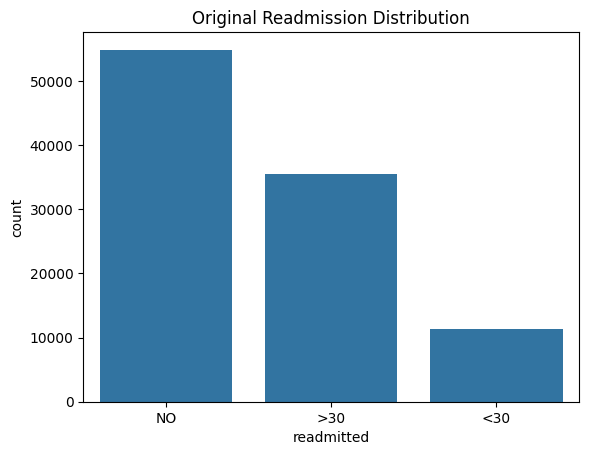

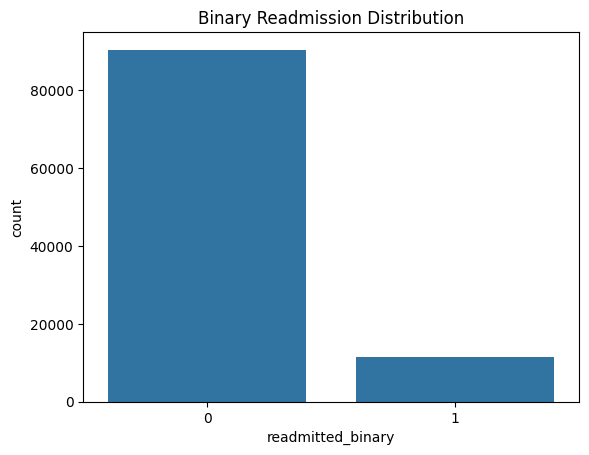

In [15]:
#Target Variable Dist 

import seaborn as sns

# converting to binary classification
df["readmitted_binary"] = df["readmitted"].apply(lambda x: 1 if x == "<30" else 0)


sns.countplot(x="readmitted", data=df)
plt.title("Original Readmission Distribution")
plt.show()

sns.countplot(x="readmitted_binary", data=df)
plt.title("Binary Readmission Distribution")
plt.show()


oooh noo this Class is imbalance , the number of not readmitted within 30 days and not readmitted is much more than readmitted.
solution- SMOTE 



### find out the missing values :
	shows % of missing data ---useless data 

In [16]:


missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing, 'Percent': missing_percent})
print(missing_data.sort_values('Percent', ascending=False).head(10))


                   Missing Values    Percent
weight                      98569  96.858479
max_glu_serum               96420  94.746772
A1Cresult                   84748  83.277322
medical_specialty           49949  49.082208
payer_code                  40256  39.557416
race                         2273   2.233555
diag_3                       1423   1.398306
diag_2                        358   0.351787
diag_1                         21   0.020636
patient_nbr                     0   0.000000


### Numeric Feature Distributions:

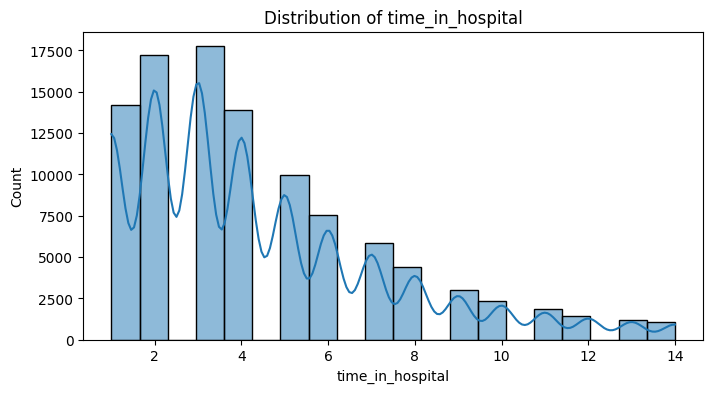

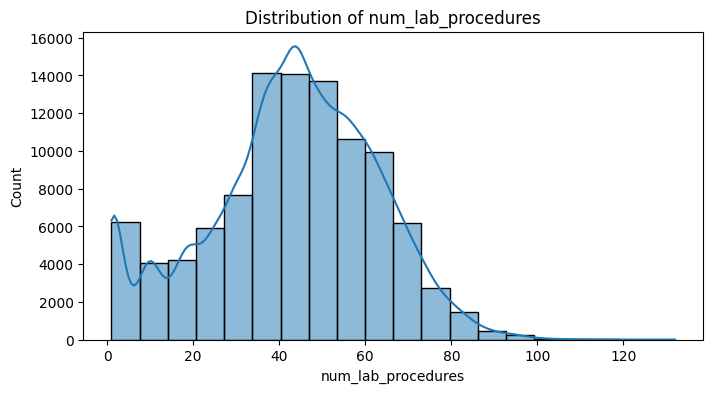

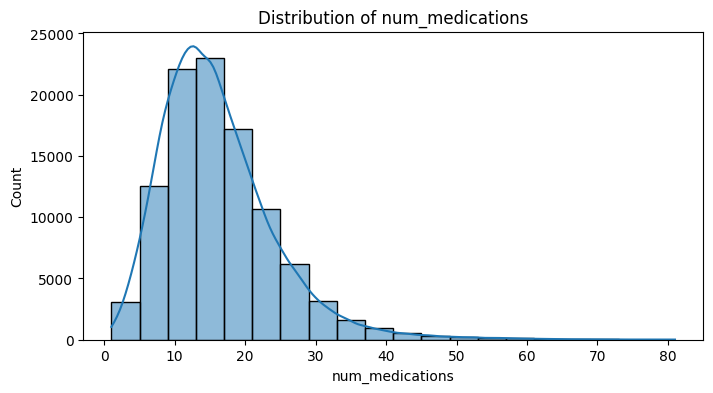

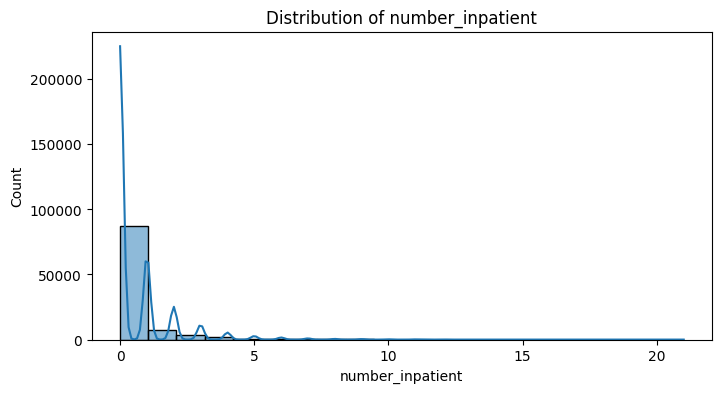

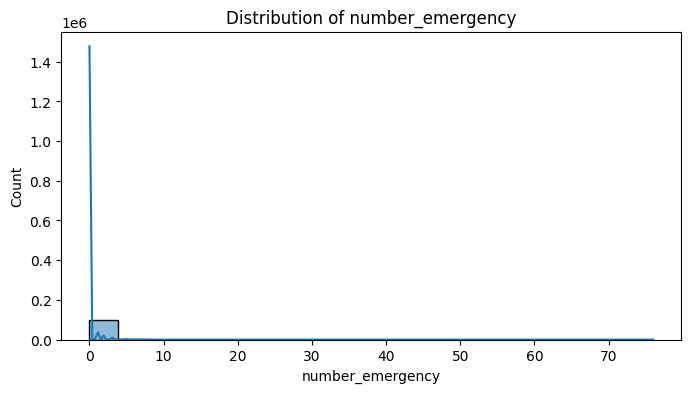

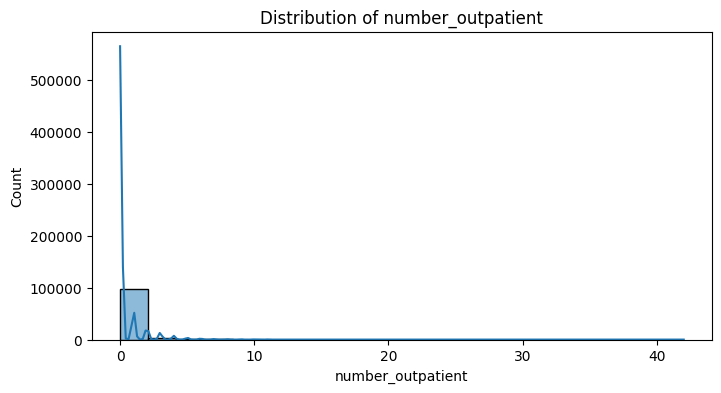

In [17]:
#Numeric Feature Distributions

numeric_cols = ['time_in_hospital', 'num_lab_procedures', 'num_medications',
                'number_inpatient', 'number_emergency', 'number_outpatient']
#numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()


### Categorical Features vs Target:

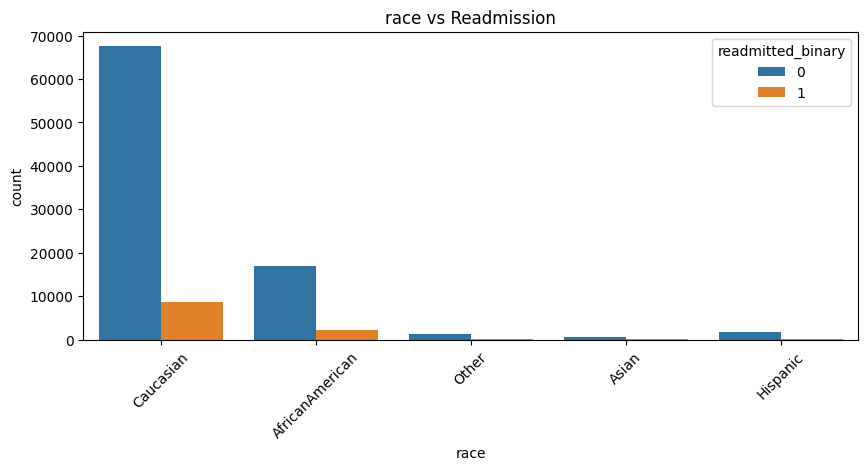

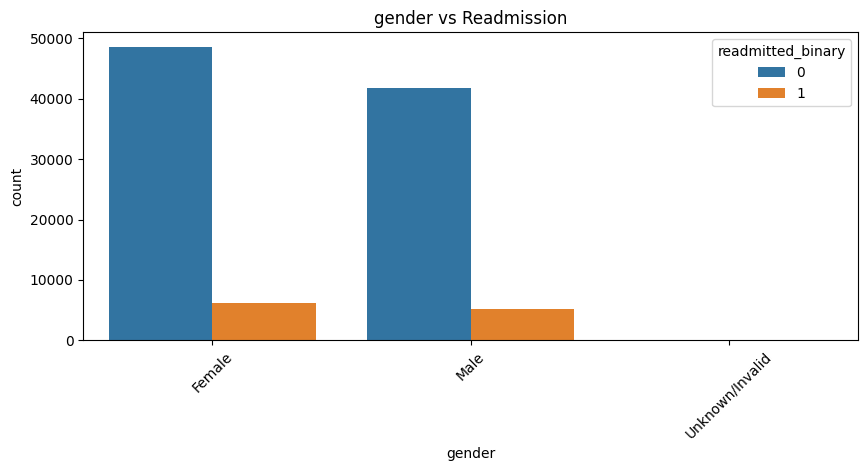

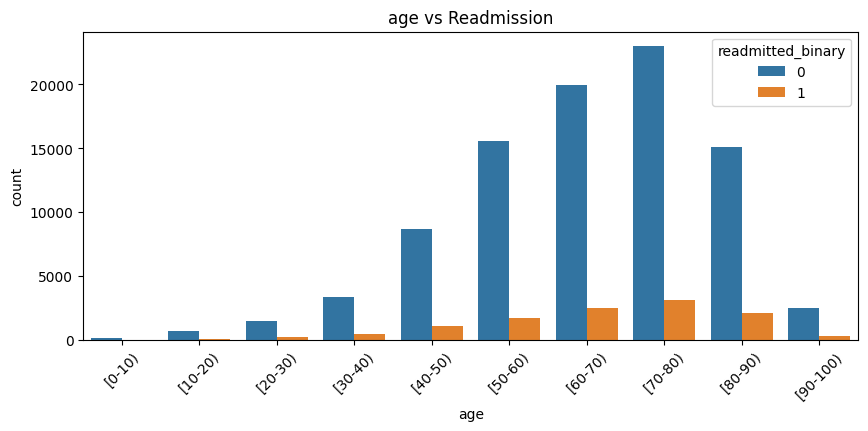

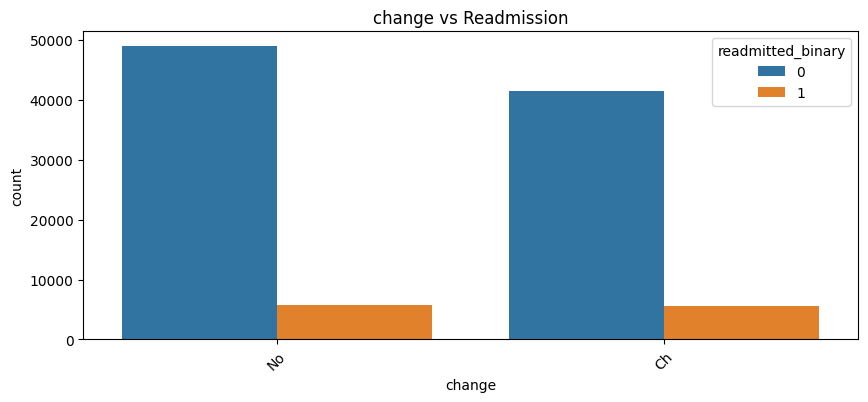

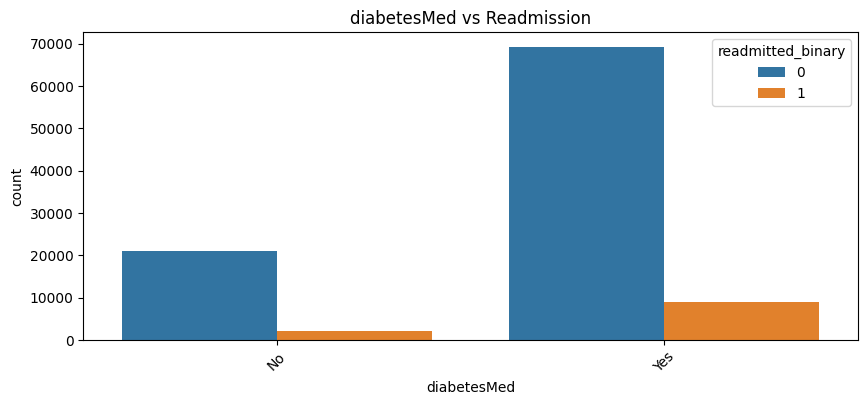

In [18]:
#Categorical Features vs Target
cat_cols = ['race', 'gender', 'age', 'change', 'diabetesMed']

for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, hue='readmitted_binary', data=df)
    plt.title(f'{col} vs Readmission')
    plt.xticks(rotation=45)
    plt.show()
    
#age vs readmission : more age means more admission (70-80)
#Can we say patients who had med changes may be more at risk? They may  feel better, that's why the doctor change med. 

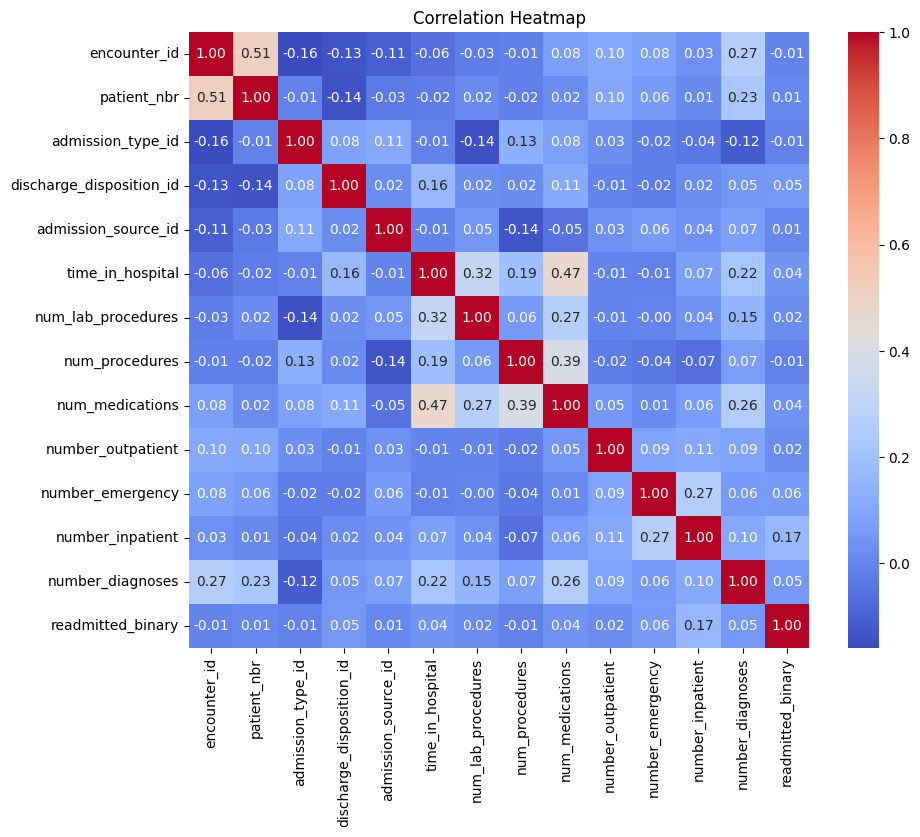

In [19]:
#Correlation heatmap 
#correlation = df.corr()
correlation = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


# Preprocessing of data :

data prepreocessing

### DROP USELESS COLUMN

In [20]:
# drop down those columns with too much missing data or no predictive value
df_clean = df.copy() #<---------------------------------taking a copy of original dataset 
df_clean.drop(["weight", "payer_code", "medical_specialty", "encounter_id", "patient_nbr"], axis=1, inplace=True)


In [21]:
# race attribute has less no. of missing values so remove only missing values not entire attributes

df_clean = df_clean[df_clean['race'].notna()]



In [22]:
#filling missing diagnosi codes
for col in ['diag_1', 'diag_2', 'diag_3']:
    df_clean[col] = df_clean[col].fillna("Unknown")



### changing target attribute into binary value 

In [23]:
#changing target attribute into binary value 
df_clean["readmitted"] = df_clean["readmitted"].apply(lambda x: 1 if x == "<30" else 0)



### Normalizes multi-class text to numbers

In [24]:
#Encoded Medication Columns(Normalizes multi-class text to numbers)
med_map = {"No": 0, "Steady": 1, "Up": 2, "Down": 3}


#### Converts textual categories to integer codes : 
for example gender  ['Male', 'Female'] → [1, 0]

age: ['[70-80)', '[60-70)' → {0, 1, 2, ...} (based on frequency)

diabetesMed: {'Yes', 'No'} → [1, 0]

change: ['Ch', 'No'] → [1, 0]

In [25]:

from sklearn.preprocessing import LabelEncoder

# Make sure the columns exist in your DataFrame
categorical_columns = ['gender', 'age', 'change', 'diabetesMed']

# Create a dictionary to store encoders if you need to inverse transform later
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    
    # Convert to string in case there are NaNs or mixed types
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))
    
    label_encoders[col] = le  


In [26]:

for col in categorical_columns:
    print(f"{col} mapping: {dict(zip(label_encoders[col].classes_, label_encoders[col].transform(label_encoders[col].classes_)))}")


gender mapping: {'Female': np.int64(0), 'Male': np.int64(1), 'Unknown/Invalid': np.int64(2)}
age mapping: {'[0-10)': np.int64(0), '[10-20)': np.int64(1), '[20-30)': np.int64(2), '[30-40)': np.int64(3), '[40-50)': np.int64(4), '[50-60)': np.int64(5), '[60-70)': np.int64(6), '[70-80)': np.int64(7), '[80-90)': np.int64(8), '[90-100)': np.int64(9)}
change mapping: {'Ch': np.int64(0), 'No': np.int64(1)}
diabetesMed mapping: {'No': np.int64(0), 'Yes': np.int64(1)}


### check values in original and copied

In [27]:
df["readmitted"].value_counts()
df["readmitted"].value_counts(normalize=True) * 100


readmitted
NO     53.911916
>30    34.928169
<30    11.159916
Name: proportion, dtype: float64

In [28]:
df_clean["readmitted"].value_counts()
df_clean["readmitted"].value_counts(normalize=True) * 100

#this is the problem facing no < 30 values are present in duplicate set

readmitted
0    88.774085
1    11.225915
Name: proportion, dtype: float64

### balance the dataset df_clean:

In [29]:
#balancing the 1 in 11.2 -->33.3
# Step 1: Separate original classes
df_less_30 = df[df['readmitted'] == "<30"]             # Target class = 1
df_other = df[df['readmitted'] != "<30"]               # Target class = 0

# Step 2: Sample balanced number from other class (2x more 0s than 1s)
df_other_sample = df_other.sample(n=len(df_less_30)*2, random_state=42)

# Step 3: Combine both
df_balanced = pd.concat([df_less_30, df_other_sample])

# Step 4: Reset index
df_balanced.reset_index(drop=True, inplace=True)

# Step 5: Replace "?" with NaN
df_balanced.replace("?", pd.NA, inplace=True)

# Now create df_clean from this balanced data
df_clean = df_balanced.copy()
df_clean["readmitted"] = df_clean["readmitted"].apply(lambda x: 1 if x == "<30" else 0)

In [30]:
df_clean["readmitted"].value_counts()
df_clean["readmitted"].value_counts(normalize=True) * 100


readmitted
0    66.666667
1    33.333333
Name: proportion, dtype: float64

### Group Diagnosis Codes into Categories

In [31]:
#Group Diagnosis Codes into Categories
def categorize_diagnosis(code):
    try:
        code = float(code)
        if (390 <= code <= 459) or (code == 785):
            return "Circulatory"
        elif (460 <= code <= 519) or (code == 786):
            return "Respiratory"
        elif (520 <= code <= 579) or (code == 787):
            return "Digestive"
        elif code == 250:
            return "Diabetes"
        elif 800 <= code <= 999:
            return "Injury"
        elif 710 <= code <= 739:
            return "Musculoskeletal"
        elif (580 <= code <= 629) or (code == 788):
            return "Genitourinary"
        else:
            return "Other"
    except:
        return "Unknown"

for col in ['diag_1', 'diag_2', 'diag_3']:
    df_clean[col] = df_clean[col].apply(categorize_diagnosis)


### One-Hot Encode Categorical Variables

In [32]:
#One-Hot Encode Categorical Variables
df_clean = pd.get_dummies(df_clean, columns=['race', 'diag_1', 'diag_2', 'diag_3'], drop_first=True)


### Feature Scaling
FOR better performance in distance-based or gradient models (Logistic Regression, SVM, KNN)


In [33]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scale_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
              'num_medications', 'number_outpatient', 'number_emergency',
              'number_inpatient', 'number_diagnoses']

scaler = StandardScaler()
df_clean[scale_cols] = scaler.fit_transform(df_clean[scale_cols])


### drop duplicates tuples

In [34]:
df_clean.drop_duplicates(inplace=True)


In [35]:
df_clean["readmitted"].value_counts()
df_clean["readmitted"].value_counts(normalize=True) * 100


readmitted
0    66.666667
1    33.333333
Name: proportion, dtype: float64

### VISULIZATION AND Heandeling the outliers

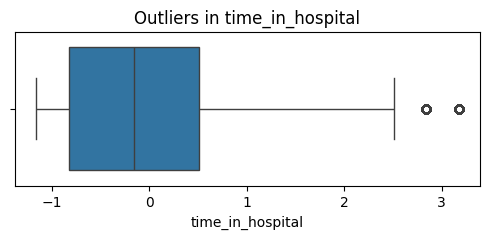

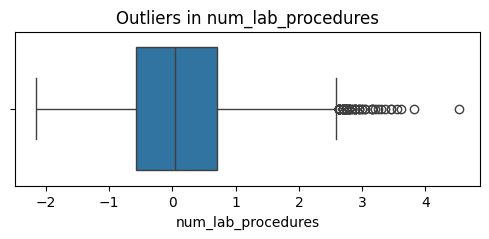

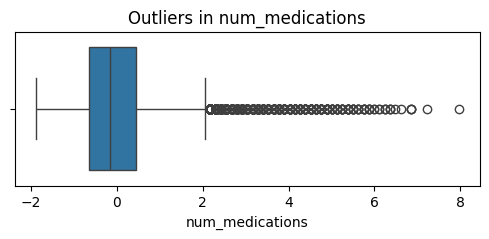

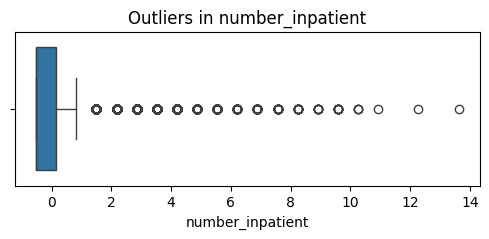

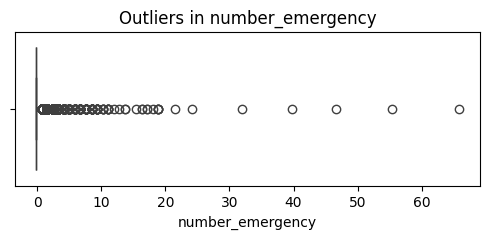

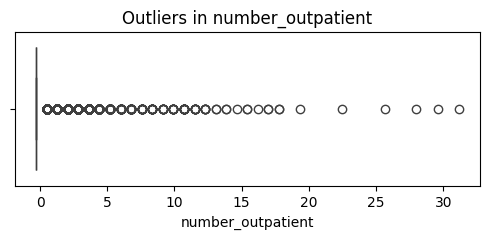

In [36]:
#lets see the outliers if any
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df_clean[col])
    plt.title(f"Outliers in {col}")
    plt.show()


In [37]:
#Apply Winsorization (Capping)
numeric_cols = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses'
]

for col in numeric_cols:
    upper_limit = df_clean[col].quantile(0.99)
    lower_limit = df_clean[col].quantile(0.01)
    df_clean[col] = df_clean[col].clip(lower=lower_limit, upper=upper_limit)


In [38]:
df_clean["readmitted"].value_counts()
df_clean["readmitted"].value_counts(normalize=True) * 100


readmitted
0    66.666667
1    33.333333
Name: proportion, dtype: float64

## Feature Engineering


### Create New Features like total_visits, total_med_change

In [39]:
#Create New Features like total_visits, total_med_change
df_clean['total_visits'] = df_clean['number_outpatient'] + df_clean['number_emergency'] + df_clean['number_inpatient']
df_clean['total_med_change'] = df_clean.iloc[:, 24:47].apply(lambda row: sum(x in [2, 3] for x in row), axis=1 )


In [40]:
#df_clean['meds_avg_level'] = df_clean[medication_cols].mean(axis=1)


### bining the age in numeric value if not present 

In [41]:

age_map = {
    '[0-10)': 0,
    '[10-20)': 1,
    '[20-30)': 2,
    '[30-40)': 3,
    '[40-50)': 4,
    '[50-60)': 5,
    '[60-70)': 6,
    '[70-80)': 7,
    '[80-90)': 8,
    '[90-100)': 9
}
df_clean['age'] = df_clean['age'].map(age_map)
df_clean['age_med_interaction'] = df_clean['age'] * df_clean['num_medications']



### Had Prior Admissions?

In [42]:
#Had Prior Admissions?
df_clean['had_inpatient'] = df_clean['number_inpatient'].apply(lambda x: 1 if x > 0 else 0)


### length of stay --new feature 

In [43]:
#length of stay
df_clean['stay_per_procedure'] = df_clean['time_in_hospital'] / (df_clean['num_procedures'] + 1)


In [44]:
df_clean["readmitted"].value_counts()
df_clean["readmitted"].value_counts(normalize=True) * 100


readmitted
0    66.666667
1    33.333333
Name: proportion, dtype: float64

# Model Training & Evaluation

In [45]:
#advance feature engineering 
leakage_columns = ['readmitted', 'readmitted_binary', 'had_inpatient', 'total_visits']  # Add more if needed
X = df_clean.drop(columns=leakage_columns)
y = df_clean['readmitted_binary']

leakage_cols = [
    'readmitted',
    'total_visits',
    'had_inpatient',
    'stay_per_procedure',
    'age_med_interaction'
]

X = X.drop(columns=[col for col in leakage_cols if col in X.columns], errors='ignore')

categorical_cols = X.select_dtypes(include='object').columns
print(categorical_cols)


Index(['gender', 'weight', 'payer_code', 'medical_specialty', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')


###  Handle missing values,Label encode object columns 

In [46]:
from sklearn.preprocessing import LabelEncoder





# Step -1: Handle missing values
X = X.fillna("missing")
y = y.fillna(0)

# Step 2: Label encode object columns (convert to string first to avoid mixed types)
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype(str)  # Convert all entries to string
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Step 4: Ensure everything is numeric
print(X.dtypes.unique())  




[dtype('int64') dtype('float64') dtype('bool')]


### Handeling the imbalanced dataset:
 using SMOTE is good , but  can use advanced oversampling techniques .it increase my recall 1 and also increase accuracy by 3 %

In [47]:
from imblearn.combine import SMOTEENN
#  using SMOTE is good , but  can use advanced oversampling techniques 

X_resampled, y_resampled = SMOTEENN(random_state=42).fit_resample(X, y)

#  Print result
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_resampled))


Class distribution after SMOTE: Counter({1: 7549, 0: 6139})


In [48]:
X_encoded = pd.get_dummies(X, drop_first=True)


In [49]:
X_encoded = X_encoded.fillna(0)  # or use SimpleImputer for better handling


In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])


In [51]:

non_numeric_cols = X.select_dtypes(include=['object']).columns
print(non_numeric_cols)


Index([], dtype='object')


In [52]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in non_numeric_cols:
    X[col] = le.fit_transform(X[col])


In [53]:
print(X.dtypes)  


encounter_id              int64
patient_nbr               int64
gender                    int64
age                       int64
weight                    int64
                          ...  
diag_3_Musculoskeletal     bool
diag_3_Other               bool
diag_3_Respiratory         bool
diag_3_Unknown             bool
total_med_change          int64
Length: 74, dtype: object


In [54]:
print(X.isnull().sum().sum())  # Should be 0
print(y.isnull().sum())        # Should be 0


0
0


In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-validated accuracy scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validated accuracy scores: [0.61129861 0.61373643 0.61388318 0.61505724 0.60786616]
Mean accuracy: 0.6123683211445254


## Enhancing Accuracy with Feature Selection + Stacking + Threshold Tuning
Feature Selection using Random Forest importance,
Model Stacking with Random Forest + XGBoost + Logistic Regression as meta-learner,

Threshold Tuning based on the ROC curve to optimize classification. 

Selected 23 important features
Selected Features: ['encounter_id', 'patient_nbr', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'metformin', 'insulin', 'change', 'race_Caucasian', 'diag_2_Other', 'diag_3_Other']
Optimal Threshold: 0.60

=== Stacked Model with Feature Selection and Threshold Tuning ===
Confusion Matrix:
 [[1116  112]
 [ 392 1118]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.91      0.82      1228
           1       0.91      0.74      0.82      1510

    accuracy                           0.82      2738
   macro avg       0.82      0.82      0.82      2738
weighted avg       0.83      0.82      0.82      2738

ROC AUC Score: 0.8984328148931122
Optimal Threshold: 0.603425

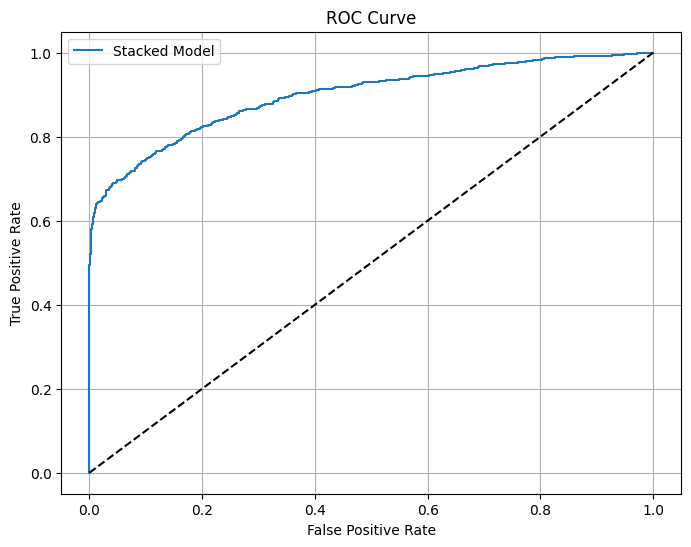

In [60]:
#  Enhancing Accuracy with Feature Selection + Stacking + Threshold Tuning

from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Step 2: Feature selection using RandomForest importance
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

print(f"Selected {X_train_selected.shape[1]} important features")
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", list(selected_features))

# Step 3: Define base and meta models for stacking
from collections import Counter
class_counts = Counter(y_train)
ratio = class_counts[0] / class_counts[1]

base_models = [
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_leaf=1, random_state=42,class_weight='balanced')),
    ('xgb', XGBClassifier(n_estimators=150, learning_rate=0.1, max_depth=6, subsample=1.0, eval_metric='logloss',scale_pos_weight=ratio))
]

meta_model = LogisticRegression(max_iter=1000)

stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacked_model.fit(X_train_selected, y_train)
y_probs = stacked_model.predict_proba(X_test_selected)[:, 1]



# Step 4: Threshold tuning using ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.2f}")

# Step 5: Predict with optimal threshold
y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

print("\n=== Stacked Model with Feature Selection and Threshold Tuning ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_optimal))
print("\nClassification Report:\n", classification_report(y_test, y_pred_optimal))
print("ROC AUC Score:", roc_auc_score(y_test, y_probs))
print("Optimal Threshold:", optimal_threshold)


# Step 6: Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Stacked Model')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Save the trained model
with open('stacking_model.pkl', 'wb') as f:
    pickle.dump(stacked_model, f)

#  Save the fitted feature selector
with open('feature_selector.pkl', 'wb') as f:
    pickle.dump(selector, f)

#  Save model evaluation metrics
metrics = {
    'accuracy': accuracy_score(y_test, y_pred_optimal),
    'precision': precision_score(y_test, y_pred_optimal),
    'recall': recall_score(y_test, y_pred_optimal),
    'f1': f1_score(y_test, y_pred_optimal),
    'report': classification_report(y_test, y_pred_optimal),
    'conf_matrix': confusion_matrix(y_test, y_pred_optimal)
}

with open('model_metrics.pkl', 'wb') as f:
    pickle.dump(metrics, f)

print("Model, selector, and metrics saved successfully.")


✅ Model, selector, and metrics saved successfully.


# Interpret the results and identify key predictors of readmission.
builting and evaluated multiple models like Random Forest, XGBoost, Logistic Regression, and SVM.
Random Forest and XGBoost perform the best overall.
Based on Random Forest feature importances and correlation analysis, the most important features driving readmissions are:


1	number_inpatient	->Count of previous inpatient visits (strongest predictor)

2	total_visits	->Sum of inpatient, emergency, outpatient visits

3	had_inpatient	_>Indicator whether patient had an inpatient visit

4	number_emergency	=>Number of emergency visits

5	number_diagnoses	->Number of diagnosis codes present

6	discharge_disposition_id	

7	time_in_hospital	

8	num_medications	Number 

9	age_med_interaction	--> new feature

10	stay_per_procedure	

